Handwritten Recognition-DeepLearning Model(Tensorflow and Keras)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8743 - loss: 0.4399
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9651 - loss: 0.1185
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9772 - loss: 0.0763
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9825 - loss: 0.0570
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9876 - loss: 0.0436
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0932
Test accuracy:0.9779
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

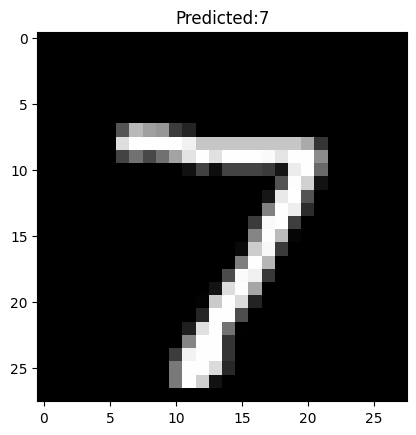

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#Normalize data
x_train,x_test=x_train/255.0,x_test/255.0
#build a sample neural network model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')])
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#train the model
model.fit(x_train,y_train,epochs=5)
#Evaluate on test data
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy:{test_acc:.4f}")
#Make predictions
predictions=model.predict(x_test)
plt.imshow(x_test[0],cmap='gray')
plt.title(f"Predicted:{predictions[0].argmax()}")
plt.show

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9113 - loss: 0.2864
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9861 - loss: 0.0437
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9905 - loss: 0.0294
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9940 - loss: 0.0184
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9950 - loss: 0.0155
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9875 - loss: 0.0446
Test accuracy:0.9912
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

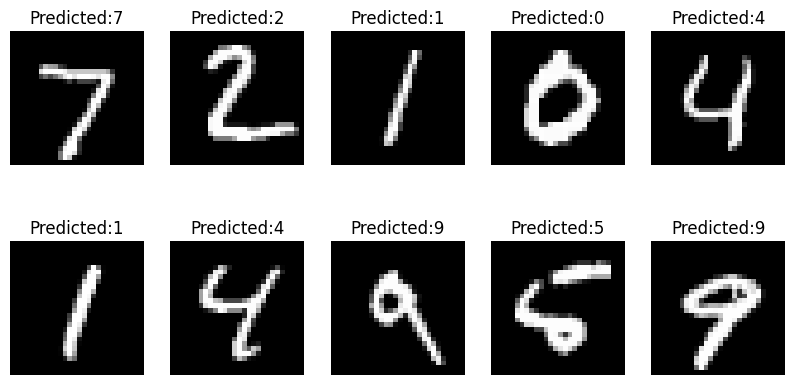

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) =keras.datasets.mnist.load_data()
#Normalize data
x_train,x_test=x_train/255.0,x_test/255.0
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
#build a smple neural network model
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#train the model
model.fit(x_train,y_train,epochs=5)
#Evaluate on test data
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy:{test_acc:.4f}")
#Make predictions
predictions=model.predict(x_test)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.title(f"Predicted:{predictions[i].argmax()}")
    plt.axis('off')
plt.show